In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from matplotlib import rc
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#feature extraction

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('heart_disease_data.csv')

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
# dataset description
# age     --->
# sex     --->   0: female    1: male
# 1: typical angina     2: atypical angina         3: no-angina pain        4: asymptomatic
# cp      ---> chest-pain-type                        نوع الم الصدر        
# trestbps---> resting-blood-pressure                    ضغط الدم
# chol    ---> cholesterol                           كوليستيرول الدم
# 0: lower than 120mg/ml            1: greater than 120mg/ml
# fbs     ---> fasting-blood-suger                   سكر الدم الصائم
# 0: normal         1: ST-T wave abnormality           2: left ventricular hypertrophy
# restecg ---> rest-ecg                        تخطيط القلب"رسم قلب"ى
# thalach ---> max-heart-rate-achived     الحد الاقصي لمعدل ضربات القلب
# 0: no           1: yes
# exang   ---> exercise-included-angina    الذبحة الصدرية نابعة عن تمرين
# oldpeak ---> st-depression                               الاكتئاب
#1: upsloping        2: flat         3: downsloping
# slope   ---> st-slope                                      الميل
# ca      ---> num-major-vessels              عدد الاوعية الدموية الرئيسية
#1: normal       2: fixed defect       3: reversible defect
# thal    ---> thalassemia                                 الثلاسيميا
# target  ---> 

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.duplicated().any()

True

In [ ]:
df = df.drop_duplicates()

normalization

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


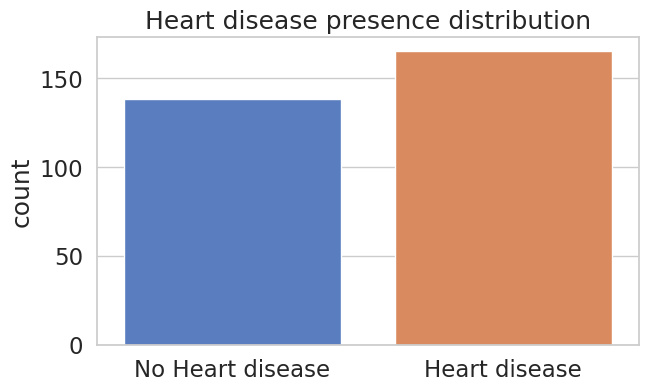

In [ ]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 7, 4

f = sns.countplot(x= y, data=df)
f.set_title("Heart disease presence distribution")
f.set_xticklabels(['No Heart disease', 'Heart disease'])
plt.show()

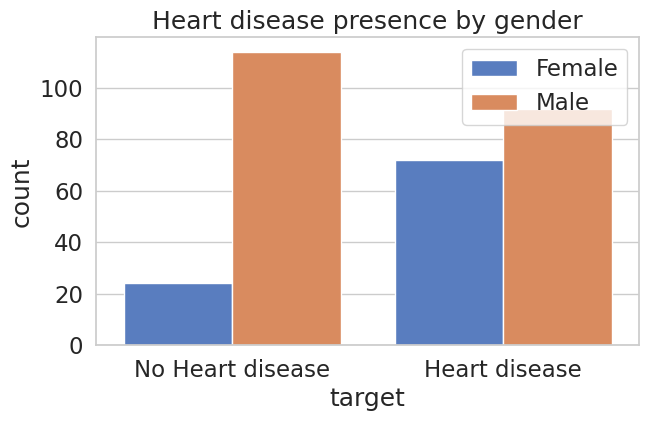

In [ ]:
f=sns.countplot(data=df, x="target", hue="sex")
plt.legend(['Female', 'Male'])
f.set_title("Heart disease presence by gender")
f.set_xticklabels(['No Heart disease', 'Heart disease'])
plt.show()

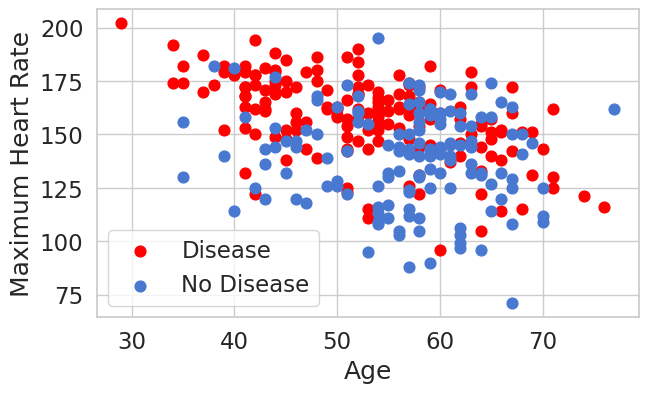

In [ ]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red", s=60)
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], s=60)
plt.legend(['Disease', 'No Disease'])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

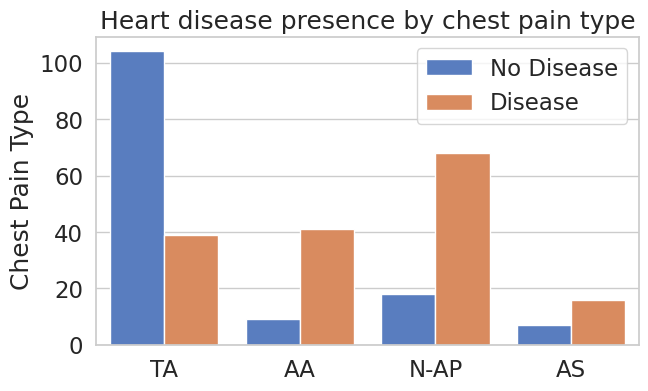

In [ ]:
f=sns.countplot(data=df, x="cp", hue="target")
plt.legend(['No Disease', 'Disease'])
f.set_title("Heart disease presence by chest pain type")
f.set_xticklabels(['TA', 'AA', 'N-AP', 'AS'])
plt.ylabel("Chest Pain Type")
plt.xlabel("")
plt.show()

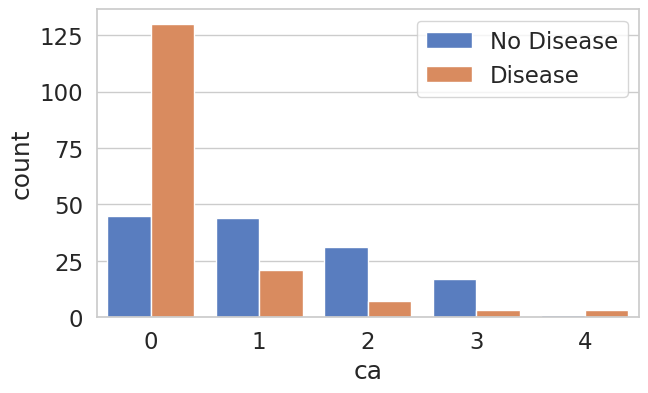

In [ ]:
f=sns.countplot(data=df, x="ca", hue="target")
plt.legend(['No Disease', 'Disease'])
plt.show()

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 22)

In [ ]:
xtest.shape

(61, 13)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# jaccard/dice/sokalsneath 77-82      ---    rogerstanimoto/matching/sokalmichener 75-82     ----       hamming 85/83      ----    russellrao 75/78    
# kulsinski 78/79       ---       
model_KN = KNeighborsClassifier(n_neighbors = 45, weights='uniform', algorithm='auto', leaf_size=30, p=1, metric='hamming', metric_params=None, n_jobs=None).fit(xtrain, ytrain)
pre = model_KN.predict(xtest)
print(model_KN.score(xtest, ytest))
# print(model_KN.score(xtrain, ytrain))

0.8524590163934426


In [ ]:
score = []
k_list = []
for k in range(1, 50):
   model_KN = KNeighborsClassifier(n_neighbors = k).fit(xtrain, ytrain)
   score.append(model_KN.score(xtest, ytest))
   k_list.append(k)
print(score)
print(k_list)

[0.5573770491803278, 0.5737704918032787, 0.639344262295082, 0.5737704918032787, 0.6557377049180327, 0.6229508196721312, 0.639344262295082, 0.6229508196721312, 0.639344262295082, 0.5409836065573771, 0.5737704918032787, 0.5573770491803278, 0.5901639344262295, 0.5737704918032787, 0.5901639344262295, 0.5901639344262295, 0.5737704918032787, 0.5737704918032787, 0.5901639344262295, 0.6229508196721312, 0.6065573770491803, 0.6065573770491803, 0.5901639344262295, 0.5737704918032787, 0.5901639344262295, 0.6065573770491803, 0.5901639344262295, 0.6065573770491803, 0.6229508196721312, 0.6229508196721312, 0.639344262295082, 0.6229508196721312, 0.6557377049180327, 0.639344262295082, 0.639344262295082, 0.639344262295082, 0.6557377049180327, 0.6721311475409836, 0.639344262295082, 0.7049180327868853, 0.6721311475409836, 0.6885245901639344, 0.6557377049180327, 0.6557377049180327, 0.6557377049180327, 0.639344262295082, 0.639344262295082, 0.639344262295082, 0.6229508196721312]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10

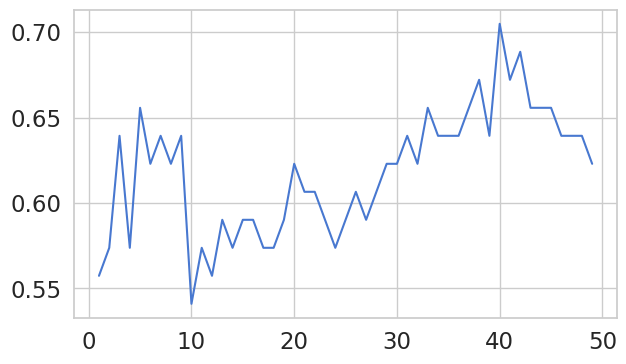

In [ ]:
plt.plot(k_list, score)

In [ ]:
print("predict new patient: ", np.argmax(model_KN.predict(np.array([[25, 1, 3, 200, 233, 1, 0, 120, 0, 2.3, 0, 0, 2]])), axis=0))

predict new patient:  0
